<div class="alert alert-info">
    <h1>Прогнозирование вероятности оттока пользователей для фитнес-центров</h1>
</div>


## Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

<div class="alert alert-info">
    <h2><a name="0.0"></a> Оглавление</h2>
</div>

* [0. Описание данных и задачи](#0.)
* [1. Загрузка данных и подготовка их к анализу](#1.)
* [2. Исследовательский анализ данных (EDA)](#2.)
    - [2.1. Изучение пропусков, средних значений и стандартных отклонений](#2.1.)
    - [2.2. Изучение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#2.2.)
    - [2.3. Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался](#2.3.)
    - [2.4. Матрица корреляций](#2.4.)
* [3. Модель прогнозирования оттока клиентов](#3.)
    - [3.1. Данные по обучающей и валидационной выборке](#3.1.)
    - [3.2. Обучение модели на train-выборке двумя способами(логистической регрессией, случайным лесом)](#3.2.)
    - [3.3. Метрики accuracy, precision и recall для обеих моделей на валидационной выборке](#3.3.)
* [4. Кластеризация клиентов](#4.)
    - [4.1. Стандартизируем данные](#4.1.)
    - [4.2. Матрица расстояний на стандартизованной матрице признаков. Дендрограмма](#4.2.)
    - [4.3. Обучение модели кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов](#4.3.)
    - [4.4. Средние значения признаков для кластеров](#4.4.)
    - [4.5. Распределения признаков для кластеров](#4.5.)
    - [4.6. Подсчет доли оттока для каждого полученного кластера](#4.6.)
* [5. Вывод и базовые рекомендации по работе с клиентами](#5.)

<div class="alert alert-info">
    <h2><a name="0."></a> Описание данных и задачи</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

Таблица **gym_churn**:  
* **Churn** — факт оттока в текущем месяце

Данные клиента за предыдущий до проверки факта оттока месяц: 
* **gender** — пол
* **Near_Location** — проживание или работа в районе, где находится фитнес-центр
* **Partner** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* **Promo_friends** —  факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* **Phone** — наличие контактного телефона
* **Age** — возраст
* **Lifetime** — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: 
* **Contract_period** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* **Month_to_end_contract** — срок до окончания текущего действующего абонемента (в месяцах)
* **Group_visits** — факт посещения групповых занятий
* **Avg_class_frequency_total** — средняя частота посещений в неделю за все время с начала действия абонемента
* **Avg_class_frequency_current_month** — средняя частота посещений в неделю за предыдущий месяц
* **Avg_additional_charges_total** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

### Задача

#### Провести анализ и подготовить план действий по удержанию клиентов.
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.   

<div class="alert alert-info">
    <h2><a name="1."></a> 1. Загрузка данных и подготовка их к анализу</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np

import plotly.express as px
from plotly import graph_objects as go

In [2]:
#df = pd.read_csv('gym_churn.csv')

In [3]:
df = pd.read_csv('/datasets/gym_churn.csv')

**Изучим общую информацию о данных.** Посмотрим таблицу. Изучим описание данных для числовых колонок.  
Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработем их.

In [4]:
display(df.head(), df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # создаём объект класса scaler (стандартизатор)
scaler.fit(df[['Age',
               'Avg_additional_charges_total',
               'Contract_period',
              'Month_to_end_contract',
              'Lifetime']]) # обучаем стандартизатор
X_sc = scaler.transform(df[['Age',
               'Avg_additional_charges_total',
               'Contract_period',
              'Month_to_end_contract',
              'Lifetime']]) # преобразуем набор данных
df_new = pd.DataFrame(data = X_sc, columns = [['Age',
               'Avg_additional_charges_total',
               'Contract_period',
              'Month_to_end_contract',
              'Lifetime']])

In [30]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4000.0,4.014566e-16,1.000125,-3.432900,-0.670435,-0.056554,0.557327,3.626733
Avg_additional_charges_total,4000.0,2.380318e-16,1.000125,-1.523667,-0.810380,-0.111306,0.664351,4.210422
Contract_period,4000.0,-5.373479e-17,1.000125,-0.809219,-0.809219,-0.809219,0.289890,1.608822
Month_to_end_contract,4000.0,-8.881784e-18,1.000125,-0.792873,-0.792873,-0.792873,0.400224,1.831941
Lifetime,4000.0,2.842171e-17,1.000125,-0.993585,-0.726833,-0.193329,0.340176,7.275732


**Посмотрим есть ли пропущенные значения в наших данных**

In [6]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

#### Посмотри наличие дубликатов

In [7]:
df.duplicated().sum()

0

#### Приведем названия столбцов к нижниму регистру

In [8]:
df.columns = map(str.lower, df.columns)

**Вывод:**  
* Данные чистые, пропусков и дубликатов нет.  
* Перевели названия столбцов в нижний регистр.


<div class="alert alert-info">
    <h2><a name="2."></a> 2. Исследовательский анализ данных (EDA)</h2>
</div>


<div class="alert alert-info">
    <h3><a name="2.1."></a> 2.1. Изучение пропусков, средних значений и стандартных отклонений</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

**Посмотрим есть ли пропущенные значения в наших данных**

In [9]:
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Пропусков нет. Данные чистые.


#### Изучим средние значения и стандартные отклонения.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


#### Вывод:
* Распределение по полу почти одинаковое
* Большинство клиентов (85%) живет или работает рядом с фитнес-клубом
* Почти половина клиентов являются сотрудниками партнерских организаций
* По программе "Приведи друга" пришли 31% клиентов
* Известны мобильные номера 90% клиентов
* Средняя длительность абонементов клиентов - 4.7 месяцев
* Групповые занятия посещают 41% клиентов
* Средний возраст клиентов 29 лет
* Дополнительные расходы на клиента в среднем - 147
* Средний срок до окончания договора - 4.3 месяца
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* Средняя частота посещений за все время - 1.88 раз в неделю
* Средняя частота посещений за последний месяц - 1.76 раз в неделю
* **Доля оттока - 27%**

<div class="alert alert-info">
    <h3><a name="2.2."></a> 2.2. Изучение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

In [11]:
df_group=df.groupby('churn').mean().T
df_group

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


### Вывод:
* Распределение по полу не отличается.
* Клиенты которые живут и работают рядом реже попадают в отток.
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты.
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток.
* Наличие мобильного номера клиента не отличается в группах.
* Средняя длительность договора больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1.7 месяца (скорее это говорит о том, что чаще клиенты заключают договор на 2-3 месяца).
* Оставшиеся пользователи чаще ходят на групповые занятия.
* Есть разница в среднем возрасте клиентов, в оттоке более молодые.
* Есть небольшое различие в выручке от других услуг фитнес-центра.
* Оставшееся время до окончания срока действия договора больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке


<div class="alert alert-info">
    <h3><a name="2.3."></a> 2.3. Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

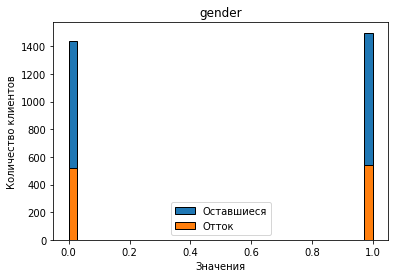

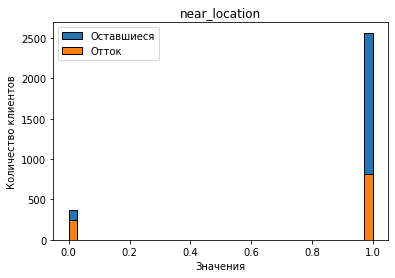

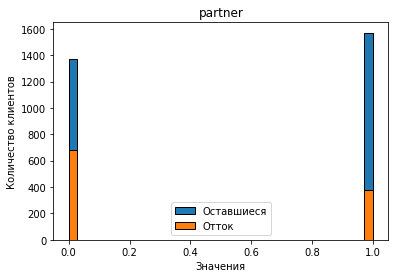

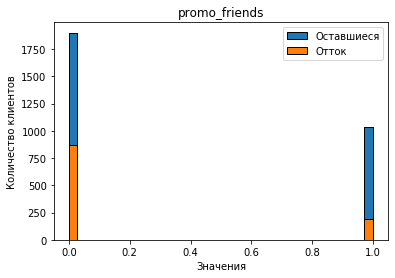

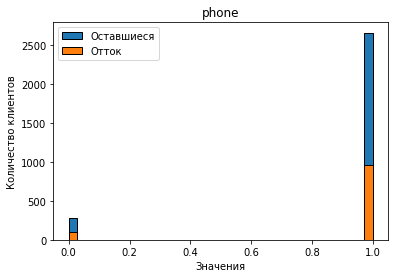

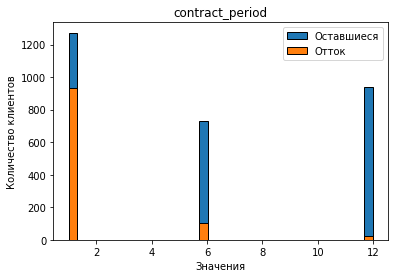

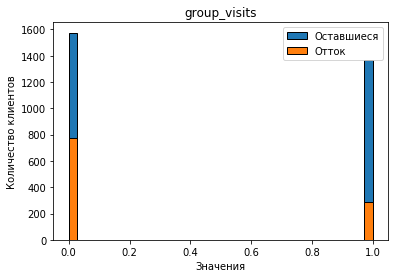

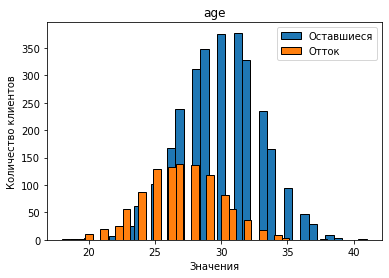

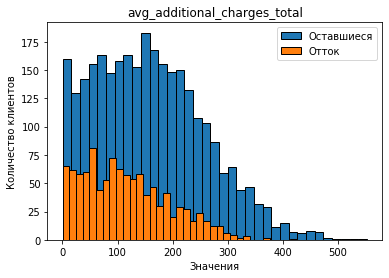

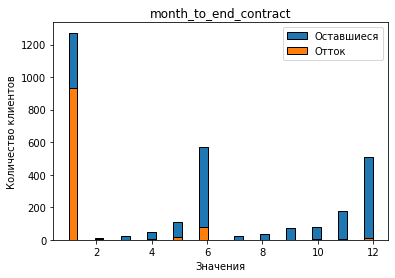

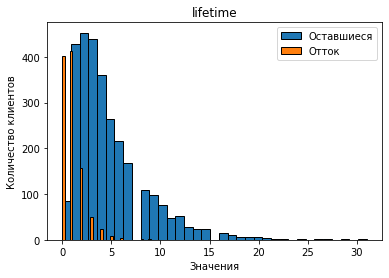

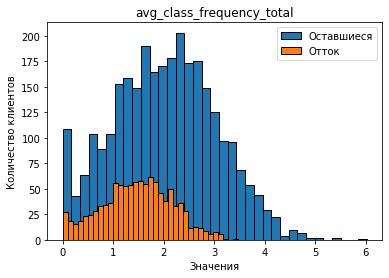

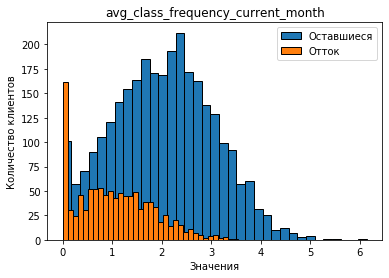

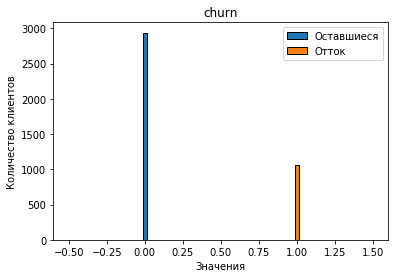

In [12]:
for column in df.columns:
    df.groupby('churn')[column].plot(kind='hist', ec='black', bins=35)
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.xlabel('Значения')
    plt.ylabel('Количество клиентов')
    plt.show()

<div class="alert alert-info">
    <h3><a name="2.4."></a> 2.4. Матрица корреляций</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

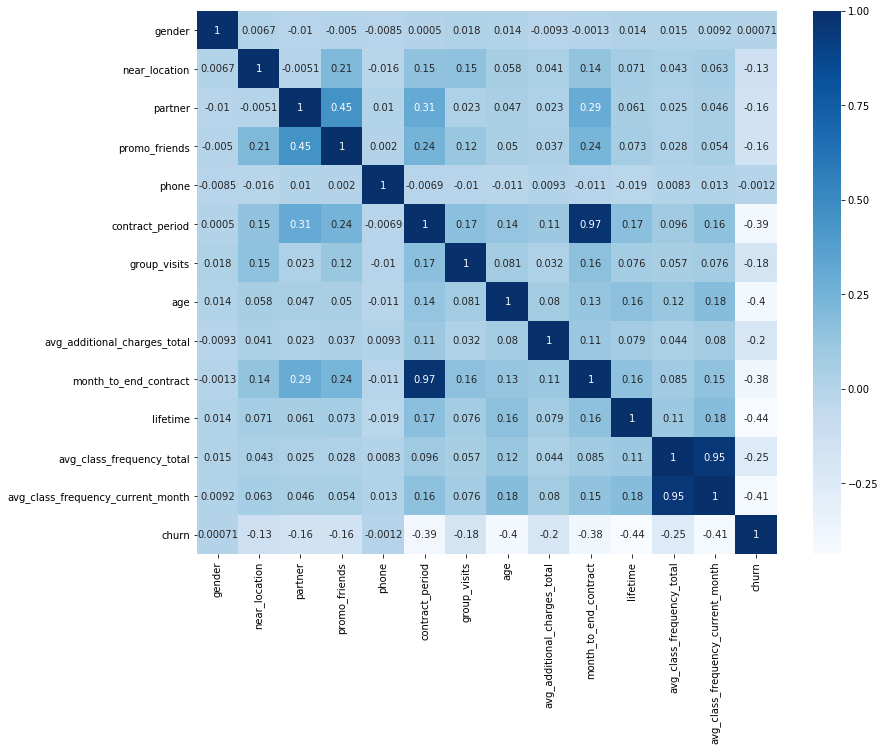

In [13]:
cm = df.corr() #вычисляем матрицу корреляций
plt.figure(figsize=(13,10))
sns.heatmap(cm, annot = True, cmap="Blues") #ваш код здесь
#ax.set_ylim(7, 0) #корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

### Вывод:
* Явной зависимости факта оттока от признаков не обнаружено
* Имеются два мультиколлинеарных признака - contract_period и month_to_end_contact
* Также avg_class_frequency_current_month и avg_class_frequency_total

<div class="alert alert-info">
    <h2><a name="3."></a> 3. Модель прогнозирования оттока клиентов</h2>
</div>


<div class="alert alert-info">
    <h3><a name="3.1."></a> 3.1. Данные по обучающей и валидационной выборке</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

#### Разобъем данные на обучающую и валидационную выборки функцией train_test_split()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(['churn'], axis = 1) #ваш код здесь
y = df['churn'] #ваш код здесь

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler() #ваш код здесь

X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
print(X_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test) #ваш код здесь

[[-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  0.57944798  0.37161711  1.59173796  1.12734972  1.75580418
   1.61822807]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125  0.31628211 -0.81299073
  -0.84769226  0.27046055 -1.09697378 -0.79568246  5.88138322 -0.2239674
  -0.01340886]
 [ 0.98511083  0.4175068   1.03175391 -0.67567125  0.31628211  1.60502986
  -0.84769226 -0.65650171 -1.18374157  1.83048     0.3350108  -0.84308456
  -0.80541199]
 [-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  0.28610954
  -0.84769226 -0.96548914 -0.95158829  0.39802775  1.39146269  0.66771379
   0.64605224]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125 -3.16173427 -0.81299073
  -0.84769226 -0.03852687  0.97190435 -0.79568246  0.07089783 -0.19587934
  -0.16038147]]


<div class="alert alert-info">
    <h3><a name="3.2."></a> 3.2. Обучение модели на train-выборке двумя способами(логистической регрессией, случайным лесом)</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

#### Обучим модель на train-выборке логистической регрессией и случайным лесом

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver='lbfgs')
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]


# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # Ваш код здесь
#

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:,1]


<div class="alert alert-info">
    <h3><a name="3.3."></a> 3.3. Метрики accuracy, precision и recall для обеих моделей на валидационной выборке</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

#### Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. 

In [19]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
    # выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')
print_all_metrics(y_test, gb_predictions, gb_probabilities, title = 'Метрики для модели градиентного бустинга:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
Метрики для модели градиентного бустинга:
	Accuracy: 0.93
	Precision: 0.88
	Recall: 0.84


### Вывод:

Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии, модель логистической регрессии показала себя лучше случайного леса.  
Мы попробовали обучить модель обучаться не паралельно, а последовательно. Градиентный бустинг показал результат выше чем у логической регрессии.

<div class="alert alert-info">
    <h2><a name="4."></a> 4. Кластеризация клиентов</h2>
</div>


<div class="alert alert-info">
    <h3><a name="4.1."></a> 4.1. Стандартизируем данные</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(df.drop(columns = ['churn'])) # обучаем нормализатор и преобразуем набор данных 
print(x_sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

<div class="alert alert-info">
    <h3><a name="4.2."></a> 4.2. Матрица расстояний на стандартизованной матрице признаков. Дендрограмма</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендограмму. Предположим, какое количество кластеров можем выделить.

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage 


In [22]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

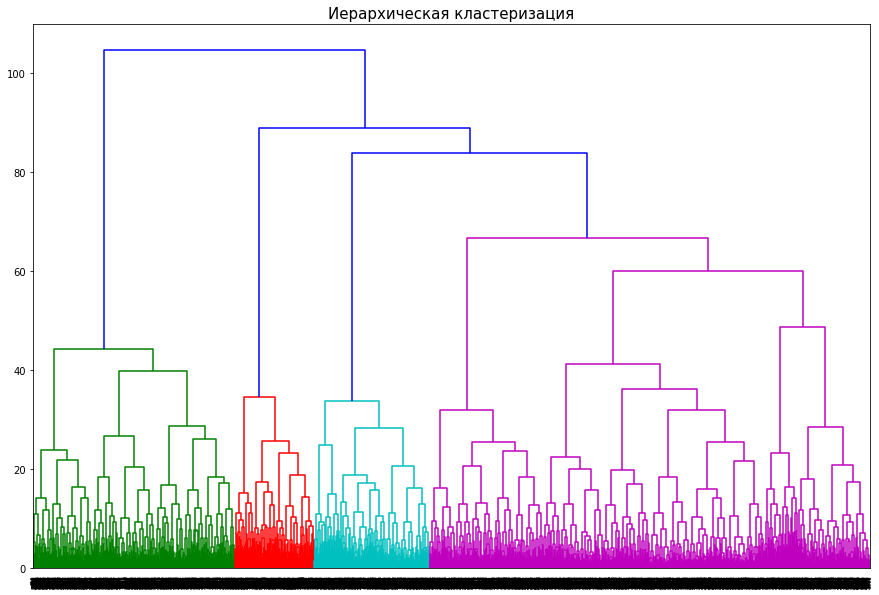

In [23]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация', fontsize=15)
plt.show() 

#### Вывод:

* Явно выделены 4 кластера
* Мы использует 5 по ТЗ

<div class="alert alert-info">
    <h3><a name="4.3."></a> 4.3. Обучение модели кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Сгруппируем объекты пошагово методом K-Means. Зададим количество кластеров, равное 5.

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

<div class="alert alert-info">
    <h3><a name="4.4."></a> 4.4. Средние значения признаков для кластеров</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Посмотрим на средние значения признаков ддля кластеров. Сделаем вывод об обнаруженных деталях.

In [25]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_fit'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
df.groupby(['cluster_fit']).mean().sort_values(by='churn')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_fit,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263


In [26]:
df.cluster_fit.value_counts()

3    1262
0    1011
4     837
2     505
1     385
Name: cluster_fit, dtype: int64

#### Описание кластеров (churn_fit):
Кластеры сортированы по оттоку, от наименьшего к наибольшему

* Кластер 0
    * Отток - 3% - самый низкий
    * Живут или работают недалеко от фитнес-центра - 96%
    * Преобладают сотрудники компаний-партнеров - 78%
    * Заключают договора на длительный срок - 11 месяцев
    * Чаще всех посещают групповые занятия - 54%
    * Чаще всех пришли по промо акции - 57%
* Кластер 4
    * Отток - 7%
    * Живут или работают недалеко от фитнес-центра - 98%
    * Чаще всех посещают клуб - 2.8 раз в неделю
    * Договора НЕ на длительный срок - в среднем 2.6 месяцев
    * Наибольшее время с момента первого обращения в фитнес-центр - 5 месяцев
    * Самые взрослые клиенты
    * Наибольшая выручка от других услуг
* Кластер 1
    * Отток - 27%
    * Живут или работают недалеко от фитнес-центра - 86%
    * Половина сотрудники компаний-партнеров - 47%
    * В основном обладатели абонементов на 5 месяцев
    * Срок до окончания текущего действующего абонемента почти равен сроку абонемента 4.5 месяцев 
    * Нет мобильного номера
* Кластер 2
    * Отток - 44%
    * Живут или работают в другом районе
    * Пришли по промо акции только 7%
    * Договора на короткий срок - в среднем 2.4 месяцев
    * Реже всех посещают групповые занятия
* Кластер 3
    * Отток - 51% - самый большой
    * Все проживают и работают в районе фитнес-центра
    * Наименьшая длительность действующего абонемента и наименьший срок до окончания абонемента - менее 2 месяцев
    * Наименьшее кол-во посещений за всё время и в последний месяц
    * Тратят на другие услуги фитнес-центра меньше всех


<div class="alert alert-info">
    <h3><a name="4.5."></a> 4.5. Распределения признаков для кластеров</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Построим распределение признаков для кластеров.

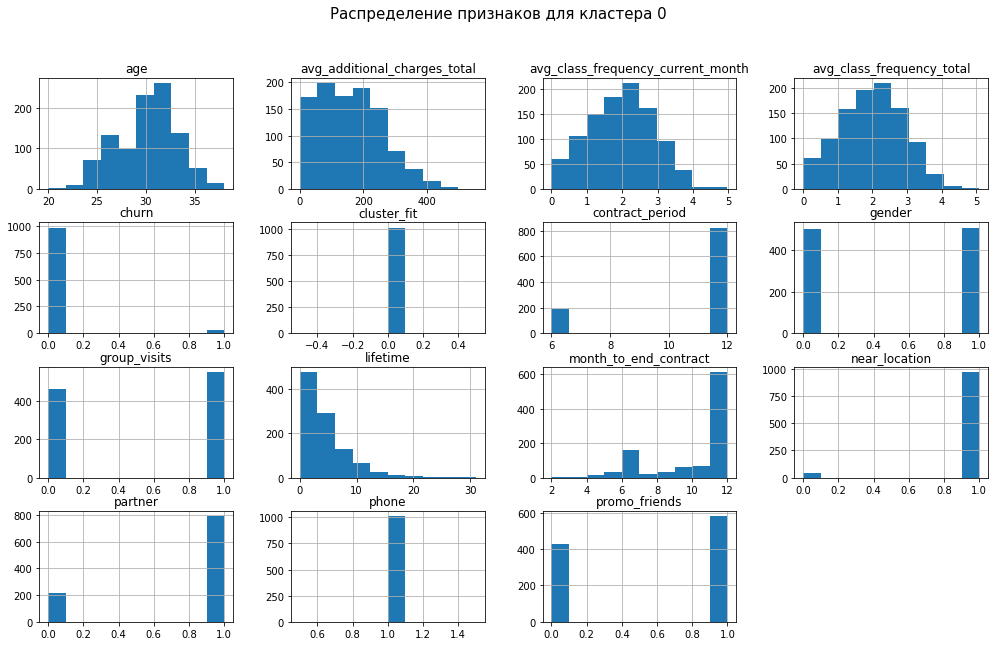

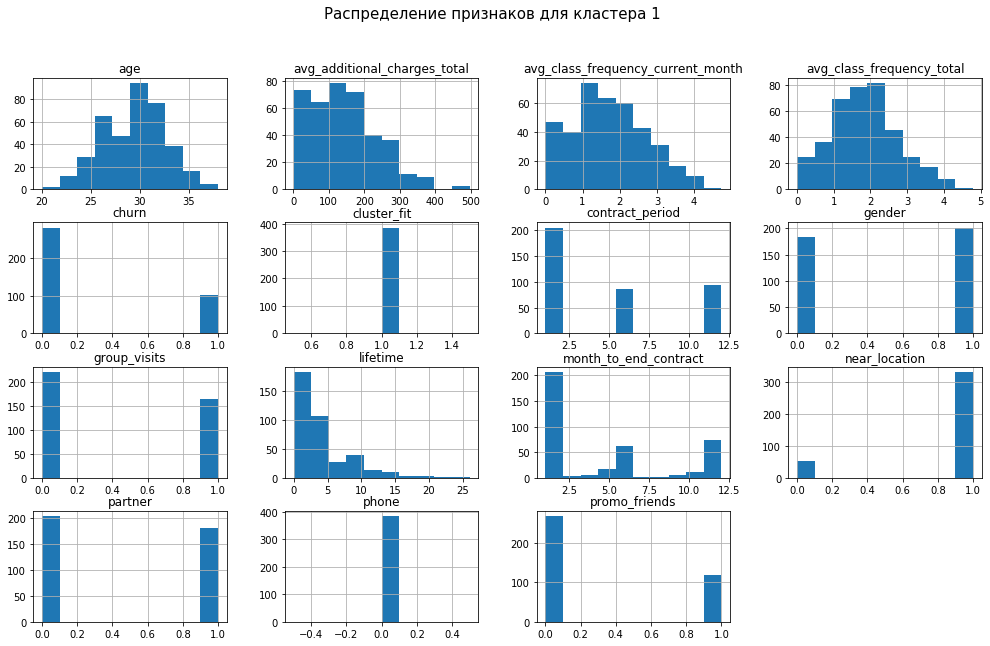

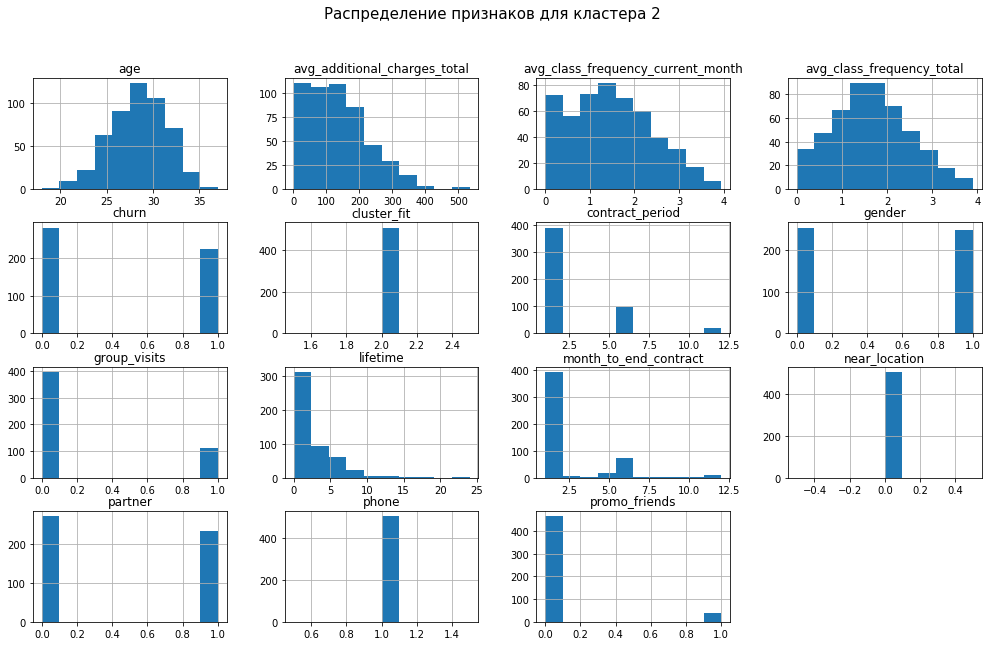

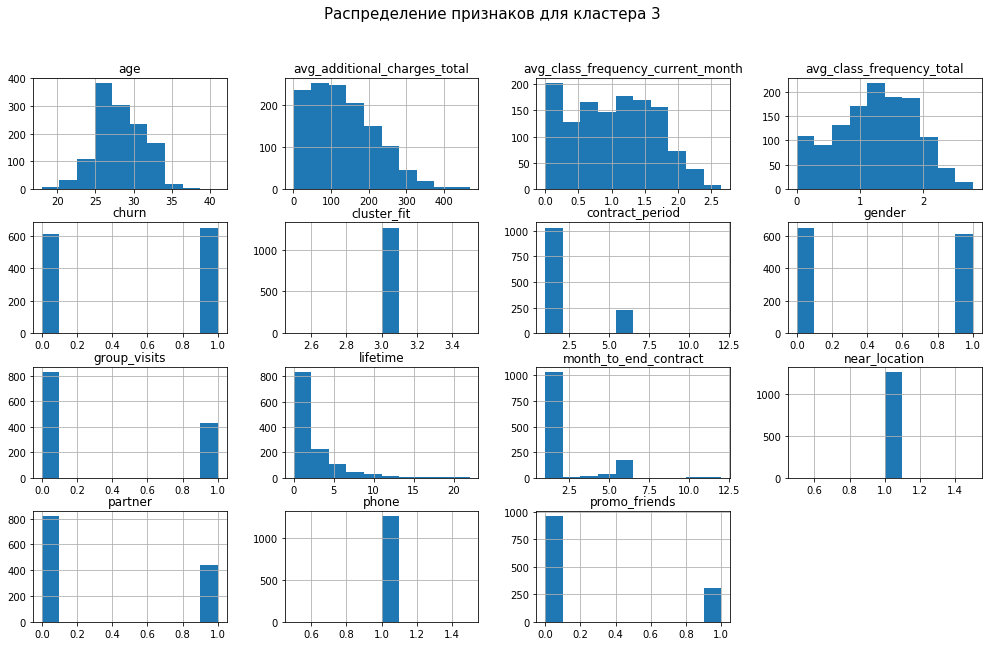

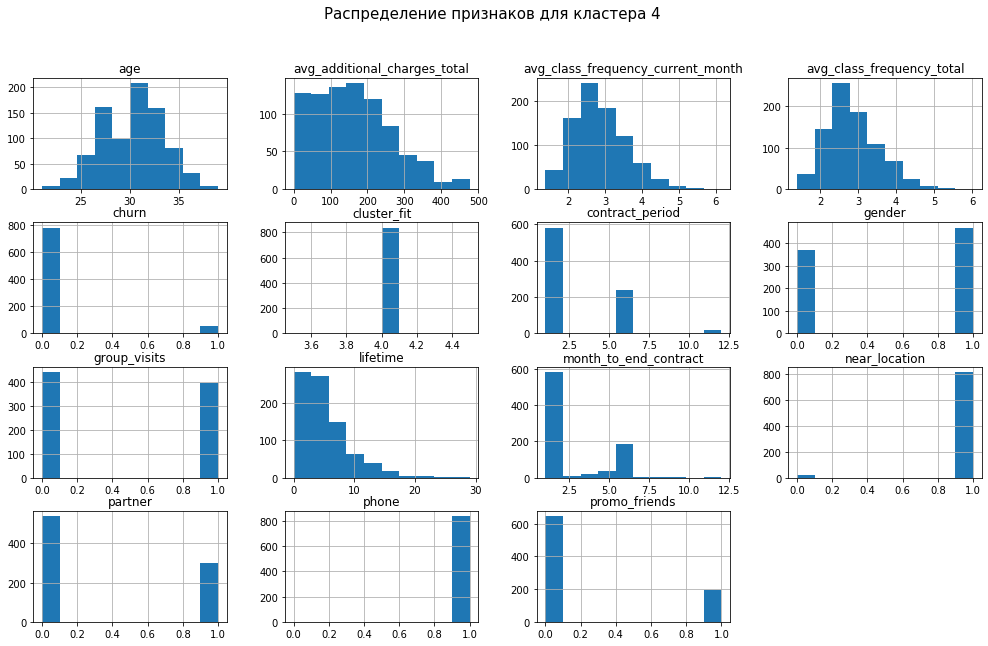

In [27]:
for value in [0, 1, 2, 3, 4]:
  df[df['cluster_fit']==value].hist(figsize=(17,10))
  plt.suptitle('Распределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

Графики подтверждают раннее описанное нами в средних значениях признаков для кластеров.
Во втором кластере 

<div class="alert alert-info">
    <h3><a name="4.6."></a> 4.6. Подсчет доли оттока для каждого полученного кластера</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

In [28]:
df.groupby(['cluster_fit']).mean()['churn'].sort_values()

cluster_fit
0    0.027695
4    0.068100
1    0.267532
2    0.443564
3    0.514263
Name: churn, dtype: float64

К оттоку склонны 2, 3 и 1 кластеры. Надежны 0 и 4. 
Отличия по долям большие. 2 и 3 занимают половину оттока. 1 кластер только четверть, а 0 и 4 единицы процентов.

<div class="alert alert-info">
    <h2><a name="5."></a> 5. Вывод и базовые рекомендации по работе с клиентами</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

Мы построили прогнозную модель с хорошей точностью. Усовершенствовали метрики модели последовательным обучением. Теперь мы можем прогнозировать вероятность оттока по каждому клиенту.  
Метрики для модели градиентного бустинга:  
	- Accuracy: 0.93
	- Precision: 0.88
	- Recall: 0.84

In [29]:
df.groupby(['cluster_fit']).mean().sort_values(by='churn')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_fit,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263


Явных зависимостей факта оттока от одного конкретного признака из рассматриваемых не обнаружено, но есть два кластера, которые очень показательны, 4 и 3.  

У них одинаково низкие показатели по компаниям-партнерам - 35%, по акции "приведи друга" - 23%, по длительности текущего действующего абонемента - 2.5 месяца. Проживание клиентов у 3 кластера 100% в районе фитнес центра, а у 4 - 98%.  

Можно сделать вывод о большом оттоке, но он разный, у 4 кластера 7% у 3 кластера 51%.  

А кординальные раличия есть в суммарной выручке от других услуг (максимальное и минимальное значение), во времени с момента первого обращения (максимальное и минимальное значение), в средней частоте посещений за неделю за весь период и за предыдущий период (максимальное и минимальное значение). Эти признаки самые влиятельные на отток клиентов и за ними надо следить в первую очередь.

* Кластер 0
    * **Отток - 3% - самый низкий**
    * Живут или работают недалеко от фитнес-центра - 96%
    * Преобладают сотрудники компаний-партнеров - 78%
    * **Заключают договора на длительный срок - 11 месяцев**
    * Чаще всех посещают групповые занятия - 54%
    * Чаще всех пришли по промо акции - 57%
* Кластер 4
    * Отток - 7%
    * Живут или работают недалеко от фитнес-центра - 98%
    * Чаще всех посещают клуб - 2.8 раз в неделю
    * Договора на короткий срок - в среднем 2.6 месяцев
    * Наибольшее время с момента первого обращения в фитнес-центр - 5 месяцев
    * **Самые взрослые клиенты**
    * **Наибольшая выручка от других услуг**
* Кластер 1
    * Отток - 27%
    * Живут или работают недалеко от фитнес-центра - 86%
    * Половина сотрудники компаний-партнеров - 47%
    * В основном обладатели абонементов на 5 месяцев
    * **Срок до окончания текущего действующего абонемента почти равен сроку абонемента 4.5 месяцев**
    * **Нет мобильного номера**
* Кластер 2
    * Отток - 44%
    * **Живут или работают в другом районе**
    * Пришли по промо акции только 7%
    * Договора на короткий срок - в среднем 2.4 месяцев
    * Реже всех посещают групповые занятия
* Кластер 3
    * **Отток - 51% - самый большой**
    * Все проживают и работают в районе фитнес-центра
    * **Наименьшая длительность действующего абонемента и наименьший срок до окончания абонемента - менее 2 месяцев**
    * Наименьшее кол-во посещений за всё время и в последний месяц
    * Тратят на другие услуги фитнес-центра меньше всех

**Рекомендации**
* Продавать абонементы на срок более 6 месяцев. Делать доп.уcлуги, когда приобретаешь абонемент на длительное время.
* Развивать сотрудничество с компаниями, партнерами клуба. 
* Брать контактные данные клиентов для связи. Стоит чаще напоминать об акциях, здоровье и занятиях спортом. 
* Следить за посещаемостью клуба. Если менее 1,5 раз в неделю за прошлый месяц, то очень велик риск оттока. 
* Клиентам у которых абонементы подходят к концу, менее 2 месяцев, делать спецпредложения, для их удержания.